In [1]:
import json
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

with open('data/N2_CASCI_energies.json', 'r') as infile:
    import json
    CASCI_energies = json.load(infile)
    CASCI_energies = {eval(a):np.array(b) for a,b in CASCI_energies.items()}
with open('data/N2_CASSCF_energies.json', 'r') as infile:
    import json
    CASSCF_energies = json.load(infile)
    CASSCF_energies = {eval(a):np.array(b) for a,b in CASSCF_energies.items()}

n = CASCI_energies[(4,(1, 1))].shape[0]
seps = np.linspace(0.8,2,n)

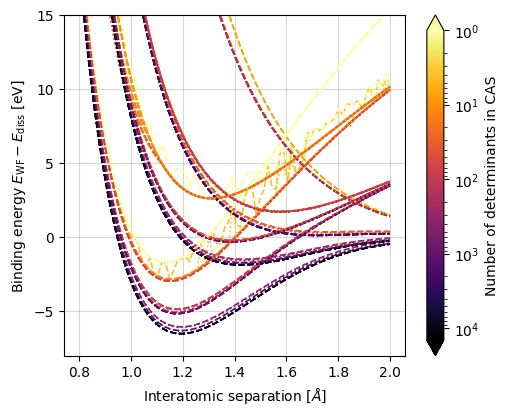

In [2]:
fig, axis = plt.subplots(figsize=(5,4))
fig.tight_layout()

ev_unit = 27.2114
shift = -107.43802032518786
max_det_log = np.log10(1/(np.math.comb(10,7)**2))

def transform(Y):
    return (Y - shift)*ev_unit

for (nao, nelec), Y_CASCI in CASCI_energies.items():
    # if nao>2 and nao != 10 and nelec != (7,7) and nelec[0]==nelec[1]:
    ndet = np.math.comb(nao, nelec[0])*np.math.comb(nao, nelec[1])
    c = plt.cm.inferno(np.log10(ndet/(np.math.comb(10,7)**2))/max_det_log)
    axis.plot(seps, transform(Y_CASCI), label=None, lw=1.2, alpha=1, ls='--', color=c)
    # axes[1].plot(seps, error(Y_CASCI), label=f'CASCI ({nao}o,{nelec}e)', lw=1.2, alpha=1, ls='--', color=c)
for (nao, nelec), Y_CASCI in CASSCF_energies.items():
    # if nao>2 and nao != 10 and nelec != (7,7) and nelec[0]==nelec[1]:
    ndet = np.math.comb(nao, nelec[0])*np.math.comb(nao, nelec[1])
    c = plt.cm.inferno(np.log10(ndet/(np.math.comb(10,7)**2))/max_det_log)
    axis.plot(seps, transform(Y_CASCI), label=None, lw=1.2, alpha=1, ls=':', color=c)
    # axes[1].plot(seps, error(Y_CASCI), label=f'CASCI ({nao}o,{nelec}e)', lw=1.2, alpha=1, ls=':', color=c)

axis.set_ylim([-8,15])
axis.set_ylabel('Binding energy $E_{\mathrm{WF}} - E_{\mathrm{diss}}$ [eV]')
axis.set_xlabel('Interatomic separation [$\AA$]')
sm = plt.cm.ScalarMappable(cmap=plt.cm.inferno_r, norm=LogNorm(1, np.math.comb(10,7)**2))
cb = plt.colorbar(sm, ax=axis, orientation='vertical', extend='both')
cb.set_label('Number of determinants in CAS')
cb.ax.invert_yaxis()
axis.grid(alpha=0.5)